In [4]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [5]:
# prepare independent features and dependent features
def prepare_data(timeseries_data, n_features):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_features # 0->3, 1->4, 2->5, 3->6, 4->7, 5->8
        if end_ix > len(timeseries_data) - 1:   # that is 8
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

### lets understand the above function

timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210] and n_features = 3.

#### Iteration 1 (i = 0):

end_ix = i + n_features = 0 + 3 = 3

seq_x = timeseries_data[0:3] = [110, 125, 133]

seq_y = timeseries_data[3] = 146

X becomes [[110, 125, 133]]

y becomes [146]

#### Iteration 2 (i = 1):

end_ix = 1 + 3 = 4
seq_x = timeseries_data[1:4] = [125, 133, 146]

seq_y = timeseries_data[4] = 158

X becomes [[110, 125, 133], [ 125, 133, 146]]

y becomes [146, 158]

#### Iteration 3 (i = 2):

end_ix = 2 + 3 = 5

seq_x = timeseries_data[2:5] = [133, 146, 158]

seq_y = timeseries_data[5] = 172

X becomes [[110, 125, 133], [ 125, 133, 146], [133, 146, 158]]

y becomes [146, 158, 172]


And so on.....

In [35]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210, 225]

# choose a number of time steps
n_steps = 3

# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [36]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]
 [187 196 210]]
[146 158 172 187 196 210 225]


In [37]:
X.shape, y.shape

((7, 3), (7,))

In [38]:
# reshape from [samples, timesptes] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [39]:
X.shape

(7, 3, 1)

# Building LSTM Model

In [49]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
# fit model
model.fit(X, y, epochs=300, verbose=0)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 50)             10400     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Predicting for the next 10 days

In [58]:
x_input = np.array([ 196, 210, 225])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<=10):
    if (len(temp_input) > 3):
        x_input = np.array(temp_input[1:])
        #print(x_input)
        print("{} day input: {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output: {}".format(i, yhat[0][0]))
        print()
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        # print(yhat.shape)
        # print(yhat[0][0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1
    

1 day input: [210.         225.         235.40763855]
1 day output: 250.3532257080078

2 day input: [225.         235.40763855 250.35322571]
2 day output: 265.4530029296875

3 day input: [235.40764 250.35323 265.453  ]
3 day output: 278.65087890625

4 day input: [250.35323 265.453   278.65088]
4 day output: 295.0951843261719

5 day input: [265.453   278.65088 295.09518]
5 day output: 311.60504150390625

6 day input: [278.65088 295.09518 311.60504]
6 day output: 327.665283203125

7 day input: [295.09518 311.60504 327.66528]
7 day output: 346.1847839355469

8 day input: [311.60504 327.66528 346.18478]
8 day output: 364.9845886230469

9 day input: [327.66528 346.18478 364.9846 ]
9 day output: 384.1617736816406

10 day input: [346.18478 364.9846  384.16177]
10 day output: 405.37408447265625



# Visualizing the output


In [52]:
import matplotlib.pyplot as plt 

In [53]:
timeseries_data 

[110, 125, 133, 146, 158, 172, 187, 196, 210, 225]

In [54]:
lst_output

[235.40764,
 250.35323,
 265.453,
 278.65088,
 295.09518,
 311.60504,
 327.66528,
 346.18478,
 364.9846,
 384.16177,
 405.37408]

In [55]:
day_new = np.arange(1, 11)
day_pred = np.arange(10, 21)
print(day_new,day_pred)

[ 1  2  3  4  5  6  7  8  9 10] [10 11 12 13 14 15 16 17 18 19 20]


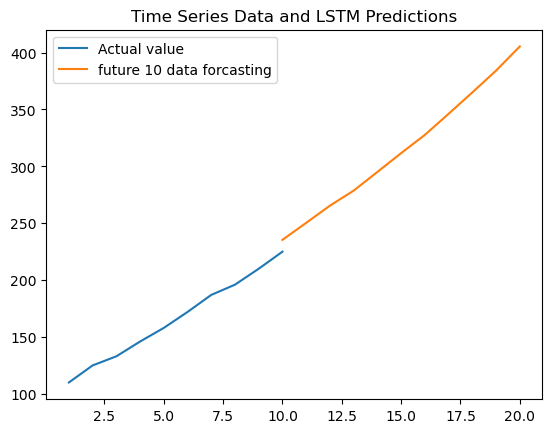

In [62]:
plt.plot(day_new, timeseries_data,label = "Actual value")
plt.plot(day_pred, lst_output,label = "future 10 data forcasting")
plt.title('Time Series Data and LSTM Predictions')
plt.legend()
plt.show()